In [11]:
#Importing the necessary libraries
import json
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx 



In [2]:
# having a look at the datasets

# load hs92 network 
with open('../data/network_hs92_4digit.json') as f:
    network_hs92 = json.load(f)

#load hs92 proximities
df_hs92_proximities = pd.read_csv('../data/hs92_proximities.csv')

df_hs92_proximities

,commoditycode_1,commoditycode_2,proximity
0,101,101,0.000000
1,101,102,0.277778
2,101,103,0.352941
3,101,104,0.260870
4,101,105,0.296296
...,...,...,...
1537595,9706,9702,0.227273
1537596,9706,9703,0.181818
1537597,9706,9704,0.318182
1537598,9706,9705,0.363636


In [3]:
# open the csv file as pd
hs92_csv = pd.read_csv('../data/hs92_proximities.csv')
hs92_csv
# calculate number of unique codes in the csv file
unique_codes = hs92_csv['commoditycode_1'].nunique() # calculate the number of unique codes 

unique_codes = int(unique_codes/2)
print('number of unique codes:',unique_codes)

# calculate the number of states
number_states = 2**unique_codes
print('number of unique states:',number_states)
#lenght of number of transitions
print('length of number of states integer:',len(str(number_states)))

# Number of transitions, assuming each state can transition to any other state 
# i.e. 2^number of states. 
number_of_transitions = (2**unique_codes) * (2**unique_codes - 1)
print('number of transitions:',number_of_transitions)
#lenght of number of transitions
print('length of number of transitions integer:',len(str(number_of_transitions)))

hs92_csv

#number_states = 2**unique_codes
#print(number_states)

number of unique codes: 620
number of unique states: 4351082437154956072465106588077822995084026820419845514849846380137705962380101572519219218556758308199541387151331336317719177934050977705242787666055883587123865770683541250307916824576
length of number of states integer: 187
number of transitions: 18931918374918312259842860525830629810325739976663871503331597251242070450959291152707445583896195211932393456580541183559732537557144432699969741598901820476247175082588401611743726515959117964678494017900263986362705114169153344627109924468740712845661571384781669219450131220598074993575355643204962938811080425843429175783004291935391734653508663697548749606659240755200
length of number of transitions integer: 374


,commoditycode_1,commoditycode_2,proximity
0,101,101,0.000000
1,101,102,0.277778
2,101,103,0.352941
3,101,104,0.260870
4,101,105,0.296296
...,...,...,...
1537595,9706,9702,0.227273
1537596,9706,9703,0.181818
1537597,9706,9704,0.318182
1537598,9706,9705,0.363636


# Assssing potential states and transitions

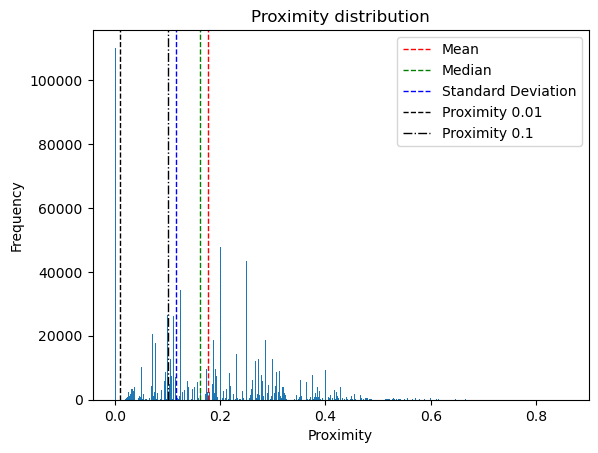

In [4]:
# plot the proximity to determine what distribution the data follows
plt.hist(hs92_csv['proximity'], bins=1000)
plt.title('Proximity distribution')
plt.xlabel('Proximity')
plt.ylabel('Frequency')

# include a vertical lines that show the mean proximity median and standard deviation
plt.axvline(hs92_csv['proximity'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(hs92_csv['proximity'].median(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(hs92_csv['proximity'].std(), color='b', linestyle='dashed', linewidth=1)

# include a line at proximity 0.01 and 0.1
plt.axvline(0.01, color='black', linestyle='dashed', linewidth=1)
plt.axvline(0.1, color='black', linestyle='dashdot', linewidth=1)

#include a legend  
plt.legend(['Mean', 'Median', 'Standard Deviation', 'Proximity 0.01', 'Proximity 0.1'])

plt.show()




In [7]:
# calculate the number of proximities between 0-0.01 and 0 - 0.1 
proximity_0_01 = hs92_csv[hs92_csv['proximity'] < 0.01]
proximity_0_1 = hs92_csv[hs92_csv['proximity'] < 0.1]

#display the number of proximities between 0-0.01 and 0-0.1 in a column along with % of the total number of proximities in a table
proximity_table = pd.DataFrame({'Proximity 0-0.01': [int(len(proximity_0_01)),len(proximity_0_01)/len(hs92_csv)*100],
                                'Proximity 0-0.1': [int(len(proximity_0_1)),len(proximity_0_1)/len(hs92_csv)*100], 
                                'Total No.': [len(hs92_csv),len(hs92_csv)/len(hs92_csv)*100]}, 
                                index=['Number of proximities', 'Percentage of total proximities'])
proximity_table

# So if we cut off values below 0.01 we remove 7.2% of proximities 
# if we cut off values below 0.1 we remove 27.5% of proximities


,Proximity 0-0.01,Proximity 0-0.1,Total No.
Number of proximities,110060.000000,423338.000000,1537600.0
Percentage of total proximities,7.157908,27.532388,100.0


In [8]:
# determine what distribtuiion the data follows by trying best fit of different distributions
# import relevant packages
import scipy.stats as stats
import matplotlib.pyplot as plt

Number greater than 0 proximities: 1427540
number of proximities: 1427540


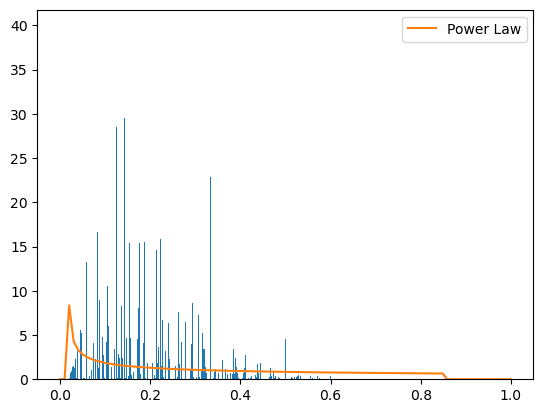

Power law fit: alpha=0.5487074456919951, loc=0.017240999999999996, scale=0.8399020000000001
Power law quality of fit: -566369.3368813732
Power law r squared value: 0.06327561916281434


In [12]:
# test fit for power law distribution 

# print number of 0 proximities in the data
print(f'Number greater than 0 proximities: {len(hs92_csv[hs92_csv["proximity"] > 0.0000000000000])}')
print(f'number of proximities: {len(hs92_csv)}')

# remove zeros from hs92_csv
hs92_csv = hs92_csv[hs92_csv['proximity'] != 0]


# fit the data to a power law distribution
fit = stats.powerlaw.fit(hs92_csv['proximity'])
# plot the data
plt.hist(hs92_csv['proximity'], bins=1000, density=True)
# plot the power law distribution
x = np.linspace(0, 1, 100)
pdf = stats.powerlaw.pdf(x, fit[0], fit[1], fit[2])
plt.plot(x, pdf, label='Power Law')
plt.legend()
plt.show()

# print the fit of the power law distribution and quality of fit
# fit[0] is the alpha parameter, fit[1] is the loc parameter, fit[2] is the scale parameter 
print(f'Power law fit: alpha={fit[0]}, loc={fit[1]}, scale={fit[2]}')
print(f'Power law quality of fit: {stats.powerlaw.nnlf(fit, hs92_csv["proximity"])}')
# r squared value
print(f'Power law r squared value: {stats.powerlaw.rvs(fit[0], loc=fit[1], scale=fit[2], size=len(hs92_csv)).var()}')



/home/rosstieman/miniconda3/envs/pathway_diversity_ECI/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:716: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


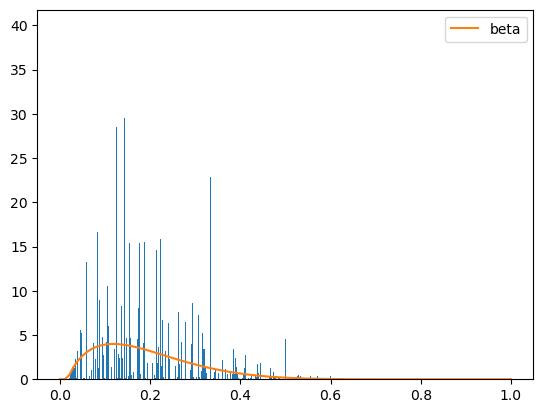

beta: alpha=1.8481922620934443, beta=7.587383077775256, loc=0.017186952617502367, scale=0.882554200882511
beta quality of fit: -1303747.571962575
beta r squared value: 0.011779814528796922


In [13]:
# fit the data to a beta distribution
fit_beta = stats.beta.fit(hs92_csv['proximity'])
# plot the data
plt.hist(hs92_csv['proximity'], bins=1000, density=True)
# plot the power law distribution
x = np.linspace(0, 1, 100)
pdf = stats.beta.pdf(x, fit_beta[0], fit_beta[1], fit_beta[2], fit_beta[3])
plt.plot(x, pdf, label='beta')
plt.legend()
plt.show()

# print the fit of the beta distribution and quality of fit
# fit[0] is the alpha parameter, fit[1] is the loc parameter, fit[2] is the scale parameter
print(f'beta: alpha={fit_beta[0]}, beta={fit_beta[1]}, loc={fit_beta[2]}, scale={fit_beta[3]}')
print(f'beta quality of fit: {stats.beta.nnlf(fit_beta, hs92_csv["proximity"])}')
# r squared value
print(f'beta r squared value: {stats.beta.rvs(fit_beta[0], fit_beta[1], loc=fit_beta[2], scale=fit_beta[3], size=len(hs92_csv)).var()}')

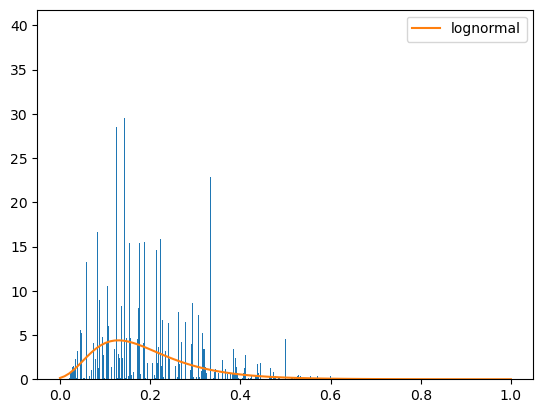

lognormal: alpha=0.5487074456919951, loc=0.017240999999999996, scale=0.8399020000000001
lognormal quality of fit: -1269695.2717486718
lognormal r squared value: 0.01308414202908401


In [14]:
# fit the data to a power law distribution
fit_log = stats.lognorm.fit(hs92_csv['proximity'])
# plot the data
plt.hist(hs92_csv['proximity'], bins=1000, density=True)
# plot the power law distribution
x = np.linspace(0, 1, 100)
pdf = stats.lognorm.pdf(x, fit_log[0], fit_log[1], fit_log[2])
plt.plot(x, pdf, label='lognormal')
plt.legend()
plt.show()

# print the fit of the beta distribution and quality of fit
# fit[0] is the alpha parameter, fit[1] is the loc parameter, fit[2] is the scale parameter
print(f'lognormal: alpha={fit[0]}, loc={fit[1]}, scale={fit[2]}')
print(f'lognormal quality of fit: {stats.lognorm.nnlf(fit_log, hs92_csv["proximity"])}')
# r squared value
print(f'lognormal r squared value: {stats.lognorm.rvs(fit_log[0], fit_log[1], fit_log[2], size=len(hs92_csv)).var()}')

In [16]:
#remove all rows with proximity less than 0.01 
hs92_csv_0_01 = hs92_csv[hs92_csv['proximity'] > 0.01]
print(hs92_csv_0_01)

# remove all rows with proximity less than 0.1
hs92_csv_0_1 = hs92_csv[hs92_csv['proximity'] > 0.1]

#calculate the number of unique codes in the csv file after removing all rows with proximity less than 0.01
unique_codes_0_01 = hs92_csv_0_01['commoditycode_1'].nunique() # calculate the number of unique codes
print('number of unique codes after removing all rows with proximity less than 0.01:',unique_codes_0_01)

# calculate the number of unique codes in the csv file after removing all rows with proximity less than 0.1
unique_codes_0_1 = hs92_csv_0_1['commoditycode_1'].nunique() # calculate the number of unique codes
print('number of unique codes after removing all rows with proximity less than 0.1:',unique_codes_0_1)


         commoditycode_1  commoditycode_2  proximity
1                    101              102   0.277778
2                    101              103   0.352941
3                    101              104   0.260870
4                    101              105   0.296296
5                    101              106   0.200000
...                  ...              ...        ...
1537594             9706             9701   0.227273
1537595             9706             9702   0.227273
1537596             9706             9703   0.181818
1537597             9706             9704   0.318182
1537598             9706             9705   0.363636

[1427540 rows x 3 columns]
number of unique codes after removing all rows with proximity less than 0.01: 1240
number of unique codes after removing all rows with proximity less than 0.1: 1240


## Assessing historical cases to limit computation complexity 

Initial considerations of computational complexity of functions. 

Functions and Their Operations

    read_proximities_and_commodity_codes:
        Reads data from a CSV file, which involves iterating over rows and storing proximity values in a dictionary.
        Complexity: O(N), where N is the number of rows in the CSV file.

    generate_states:
        Generates all possible states (combinations of commodity codes up to a maximum size).
        Complexity: O(2^N), where N is the number of commodity codes. In practice, it generates combinations up to a specified maximum size (max_codes), which limits the total combinations significantly compared to 2^N.

    calculate_transition_probability:
        Calculates the transition probability between two states based on the sum of proximities.
        Involves nested loops over elements in state1 and state2.
        Complexity: O(M * P), where M and P are the sizes of state1 and state2, respectively. In the worst case, this could be O(N^2), where N is the number of commodity codes.

    create_transition_matrix:
        Constructs a transition matrix by iterating over all pairs of states and calculating transition probabilities.
        Complexity: O(S^2 * N^2), where S is the number of states and N is the number of commodity codes. This is because it iterates over all pairs of states (S^2) and calls calculate_transition_probability, which has a complexity of O(N^2).

    simulate_markov_process:
        Simulates a Markov process using matrix-vector multiplication and normalization.
        Complexity: O(T * S^2), where T is the number of steps and S is the number of states. This is dominated by the matrix-vector multiplication, which in sparse matrix terms can be more efficient than dense matrix operations.


## Means to minimize computational tasks and required historical data
- max_codes: this limits the maximum amount of codes that can make up a given state. We need to calculate using empirical data what the maximum number of commodity codes a given country has ever been competitive in at a given time, as this gives an upper bound for the amount of commodity  codes in a given state we need to consider. This is consistent with Product Space definitions which require a country to export a product at a revealed comparative advantage > 1, by definition it is not possibe for a country to have an RCA > 1 for every product. 

- proximity_threshold: this is the threshold of proximity considered in the transition matrix. This could be done in two ways, first at the commodity to commodity level, i.e. filtering the initial data set to remove proximity measures below a certain threshold. This requires analysis of the distributions of values for proximity measures, after which we can make a selection about what seems like a reasonable threshold. 

- maximum_code_additions: 


### Other means to reduce computational complexity
- State_transition_threshold: We only consider and store in the transition matrix state transitions above a certain value, e.g. we might only consider the state transitions probabilities with a value above 10%. This is implemented at the transition matrix creation stage. Thus has less of a benefit 




In [32]:
# DETERMING REASONABLE NUMBER FOR MAX_CODES 

# We look at Japan because it has the highest ECI 

# load the country data
japan = pd.read_csv("../data/Japan/what_did_japan_export_2021.csv")

# change Revealed Comparative Advantage (RCA) to RCA 
japan = japan.rename(columns={'Revealed Comparative Advantage (RCA)': 'RCA'})

# remove all rows with RCA less than 1  
japan = japan[japan['RCA'] > 1]

japan

# count the number of commodity codes in hs92 proximities and in japan
japan_commodity_codes = japan['Code'].nunique()
hs92_commodity_codes = hs92_csv['commoditycode_1'].nunique()

print('japan product codes', japan_commodity_codes)
print('global product codes', hs92_commodity_codes)

print('fraction of commodity codes in japan:',japan_commodity_codes/hs92_commodity_codes)

japan product codes 266
global product codes 1240
fraction of commodity codes in japan: 0.21451612903225806


In [40]:
# Next we look at some countries with large populations to see if they have a large number of commodity codes

# China 

# load the country data
china = pd.read_csv("../data/China/what_did_china_export_in_2021.csv")

# change Revealed Comparative Advantage (RCA) to RCA 
china = china.rename(columns={'Revealed Comparative Advantage (RCA)': 'RCA'})

# remove all rows with RCA less than 1  
china = china[china['RCA'] > 1]

# count the number of commodity codes in hs92 proximities and in japan
china_commodity_codes = china['Code'].nunique()
hs92_commodity_codes = hs92_csv['commoditycode_1'].nunique()

print('china product codes', china_commodity_codes)
print('global product codes', hs92_commodity_codes)

print('fraction of commodity codes in china:',china_commodity_codes/hs92_commodity_codes)

china

# country size also matters as well as ECI

china product codes 390
global product codes 1240
fraction of commodity codes in japan: 0.31451612903225806


,Name,Code,Year,Country Trade,World Trade,RCA,Sector
0,Horses,0101 HS92,2021,$668M,$4.34B,1.09,Agriculture
1,Live Fish,0301 HS92,2021,$701M,$2.29B,2.06,Agriculture
2,Molluscs,0307 HS92,2021,$2.31B,$10.8B,1.36,Agriculture
3,"Animal guts, except fish",0504 HS92,2021,$879M,$4.79B,1.11,Agriculture
4,"Onions, shallots, garlic",0703 HS92,2021,$2.46B,$7.30B,2.05,Agriculture
...,...,...,...,...,...,...,...
385,Buttons,9606 HS92,2021,$671M,$1.77B,2.70,Machinery
386,Slide fasteners,9607 HS92,2021,$1.39B,$3.20B,3.04,Machinery
387,Pens,9608 HS92,2021,$1.76B,$6.34B,1.70,Machinery
388,"Pencils, crayons, pastels, etc.",9609 HS92,2021,$630M,$1.59B,2.40,Machinery


In [46]:
# Next we look at some countries with large populations to see if they have a large number of commodity codes

# India 

# load the country data
india = pd.read_csv("../data/India/what_did_india_export_in_2021.csv")

# change Revealed Comparative Advantage (RCA) to RCA 
india = india.rename(columns={'Revealed Comparative Advantage (RCA)': 'RCA'})

# remove all rows with RCA less than 1  
india = india[india['RCA'] > 1]

# count the number of commodity codes in hs92 proximities and in japan
india_commodity_codes = india['Code'].nunique()
hs92_commodity_codes = hs92_csv['commoditycode_1'].nunique()

print('india product codes', india_commodity_codes)
print('global product codes', hs92_commodity_codes)

print('fraction of commodity codes in india:',india_commodity_codes/hs92_commodity_codes)

india

# country size also matters as well as ECI

india product codes 268
global product codes 1240
fraction of commodity codes in india: 0.2161290322580645


,Name,Code,Year,Country Trade,World Trade,RCA,Sector
0,Beef (frozen),0202 HS92,2021,$2.78B,$30.5B,4.50,Agriculture
1,Edible offal,0206 HS92,2021,$261M,$9.47B,1.37,Agriculture
2,Crustaceans,0306 HS92,2021,$5.22B,$31.7B,8.30,Agriculture
3,Molluscs,0307 HS92,2021,$634M,$10.8B,3.06,Agriculture
4,Honey,0409 HS92,2021,$144M,$2.60B,2.73,Agriculture
...,...,...,...,...,...,...,...
263,Other vessels,8906 HS92,2021,$232M,$5.04B,2.33,Vehicles
264,Parts of military weapons,9305 HS92,2021,$163M,$2.64B,3.19,Machinery
265,Mattresses and bedding,9404 HS92,2021,$835M,$22.3B,1.87,Textiles
266,Pens,9608 HS92,2021,$183M,$6.34B,1.45,Machinery


In [44]:
# Next we look at some countries with large GDP, large populations, and high ECI 

#United States 

# load the country data
us = pd.read_csv("../data/what_did_united_states_export_in_2021.csv")

# change Revealed Comparative Advantage (RCA) to RCA 
us = us.rename(columns={'Revealed Comparative Advantage (RCA)': 'RCA'})

# remove all rows with RCA less than 1  
us = us[us['RCA'] > 1]

# count the number of commodity codes in hs92 proximities and in japan
us_commodity_codes = us['Code'].nunique()
hs92_commodity_codes = hs92_csv['commoditycode_1'].nunique()

print('us product codes', us_commodity_codes)
print('global product codes', hs92_commodity_codes)

print('fraction of commodity codes in us:',us_commodity_codes/hs92_commodity_codes)

us

# country size also matters as well as ECI


us product codes 289
global product codes 1240
fraction of commodity codes in us: 0.23306451612903226


,Name,Code,Year,Country Trade,World Trade,RCA,Sector
0,Fowl,0105 HS92,2021,$274M,$3.28B,1.01,Agriculture
1,Beef,0201 HS92,2021,$4.55B,$27.5B,1.99,Agriculture
2,Beef (frozen),0202 HS92,2021,$4.33B,$30.5B,1.72,Agriculture
3,Pork,0203 HS92,2021,$5.84B,$36.2B,1.95,Agriculture
4,Edible offal,0206 HS92,2021,$2.02B,$9.47B,2.60,Agriculture
...,...,...,...,...,...,...,...
284,"Medical, dental or veterinary furniture",9402 HS92,2021,$606M,$4.98B,1.52,Textiles
285,Typewriter ribbons and ink pads,9612 HS92,2021,$129M,$1.54B,1.04,Machinery
286,Paintings and drawings,9701 HS92,2021,$5.44B,$17.6B,3.94,Textiles
287,Sculptures,9703 HS92,2021,$1.05B,$3.88B,3.35,Textiles


max_codes: can be set at 390

## Next we look at the number of products added per time step 
first we scope which countries to investigate in detail by looking at which countries had the greatest jump in ECI in a given year

In [63]:
complexity_rankings = pd.read_csv('../data/Country Complexity Rankings 1995 - 2021.csv')

print(complexity_rankings.dtypes)

complexity_rankings[''] = pd.to_numeric(complexity_rankings, errors='coerce')

# calculate the maximum increase in complexity per year in ECI rank where ECI ranks are columns
complexity_rankings['max_increase'] = complexity_rankings.diff(axis=1).max(axis=1)
complexity_rankings


Country           object
ECI Rank 1995    float64
ECI Rank 1996    float64
ECI Rank 1997    float64
ECI Rank 1998    float64
                  ...   
COI Rank 2017      int64
COI Rank 2018      int64
COI Rank 2019      int64
COI Rank 2020      int64
COI Rank 2021      int64
Length: 109, dtype: object


TypeError: arg must be a list, tuple, 1-d array, or Series